In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle 
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import sys


# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns


# librairies scikit learn
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets



#les 3 fonctions : 1- suppression d'un nombre de données, 2- réequilibrage du dataframe selon versicolor et 3- réequilibrage mais ne renvoyant que les données générées


In [ ]:
#count : la quantité qu'on veut supprimer
#df : les données iris directement
def cut_from_versicolor(count, df):
  group = df.groupby('species')
  versicolor = group.get_group('versicolor')
  others = pd.concat([group.get_group('virginica'), group.get_group('setosa')])
  versicolor = versicolor.sample(50-count)
  return pd.concat([others, versicolor])#.sample(len(others)+len(versicolor))

-  la seconde fonction sert à générer les données manquantes et à les mettre dans le dataframe. (pour SMOTE ça se fait tout seul, pour SDV et la génération statistique, il faut le faire à la main.)
-  c'est celle qu'on utilise dans la dernière boucle d'expérimentation.



In [ ]:
#détecte automatiquement combien de données il faut générer
#il faut juste lui passer un dataframe avec moins de versicolor que des autres
def generate_versicolor(cutdf):
  #extraction des versicolor
  group = cutdf.groupby('species')
  #versicolor contient les exemples de versicolor dans cutdf
  versicolor = group.get_group('versicolor')
  #others contient les exemples des autres espèces
  others = pd.concat([group.get_group('virginica'), group.get_group('setosa')])
  #calcul de combien il faut regénérer (pour SMOTE ce n'est pas la peine)
  count=50-len(versicolor)

  stat = versicolor.describe()
  sepal_length = np.random.normal(loc=stat['sepal_length']['mean'], scale=stat['sepal_length']['std'], size=count)
  sepal_width = np.random.normal(loc=stat['sepal_width']['mean'], scale=stat['sepal_width']['std'], size=count)
  petal_length = np.random.normal(loc=stat['petal_length']['mean'], scale=stat['petal_length']['std'], size=count)
  petal_width = np.random.normal(loc=stat['petal_width']['mean'], scale=stat['petal_width']['std'], size=count)

  newData = pd.DataFrame()
  newData['sepal_length']=sepal_length
  newData['sepal_width']=sepal_width
  newData['petal_length']=petal_length
  newData['petal_width']=petal_width
  newData['species']=['versicolor']*count

  versicolor = pd.concat([versicolor, newData])

  #On concatène versicolor et les deux autres après avoir ajouté des exemples à versicolor.
  newdf = pd.concat([versicolor, others]).reset_index().drop('index', axis=1)
  print(newdf.columns)
  if len(newdf)!=150:
    print("final length is not 150 !")
  return newdf

-  3e fonction : generate_and_get_versicolor qui ne renvoie que les données générées. Pour les SDV et la génération statistique, on génère nous-mêmes les données donc il suffit de les retourner avant de les concaténer aux autres.Pour SMOTE, il faudra les extraire du dataframe équilibré en ayant gardé la liste des données versicolor non-supprimées et en faisant un truc du genre


```
non_deleted_versicolor = cutdf.loc[cutdf['species']=='versicolor']
#récupérer les données générées par smote
generatedVersicolor = [ex for ex in smoteOutput.loc[smoteOutput['species']=='versicolor'] if ex not in non_deleted_versicolor]
```

On utilise cette fonction dans les deux premières boucles d'expérimentation

In [ ]:
def generate_and_get_versicolor(cutdf):
  #extraction des versicolor
  group = cutdf.groupby('species')
  versicolor = group.get_group('versicolor')
  others = pd.concat([group.get_group('virginica'), group.get_group('setosa')])
  
  count=50-len(versicolor)
  stat = versicolor.describe()
  sepal_length = np.random.normal(loc=stat['sepal_length']['mean'], scale=stat['sepal_length']['std'], size=count)
  sepal_width = np.random.normal(loc=stat['sepal_width']['mean'], scale=stat['sepal_width']['std'], size=count)
  petal_length = np.random.normal(loc=stat['petal_length']['mean'], scale=stat['petal_length']['std'], size=count)
  petal_width = np.random.normal(loc=stat['petal_width']['mean'], scale=stat['petal_width']['std'], size=count)

  newData = pd.DataFrame()
  newData['sepal_length']=sepal_length
  newData['sepal_width']=sepal_width
  newData['petal_length']=petal_length
  newData['petal_width']=petal_width
  newData['species']=['versicolor']*count

  versicolor = pd.concat([versicolor, newData])
  return versicolor

#extraction des données

In [ ]:
import seaborn as sns
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#Supprimer 45 données, les regénérer et regarder juste ces 45 données sur un plot

-   pour cela on utilise generate_and_get_versicolor.
-   le plot nous servira pour la partie "comparaison"

In [ ]:
cut = cut_from_versicolor(45, df)
cut['species'].value_counts()

virginica     50
setosa        50
versicolor     5
Name: species, dtype: int64

In [ ]:
gen = generate_and_get_versicolor(cut)
gen.loc[gen['species']=='versicolor'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
61,5.9,3.0,4.2,1.5,versicolor
71,6.1,2.8,4.0,1.3,versicolor
57,4.9,2.4,3.3,1.0,versicolor
67,5.8,2.7,4.1,1.0,versicolor
96,5.7,2.9,4.2,1.3,versicolor


Faire un scatterplot des 45 données générées (on mettra nos plots côte-à-côte pour les comparer dans le rapport (je choisis arbitrairement la paire de features petal_length et sepal_width)

J'ajoute aussi sur le même scatter les deux autres classes, pour voir si on en est bien séparés

In [ ]:
virginica = df.loc[df["species"]=="virginica"]
setosa = df.loc[df["species"]=="setosa"]

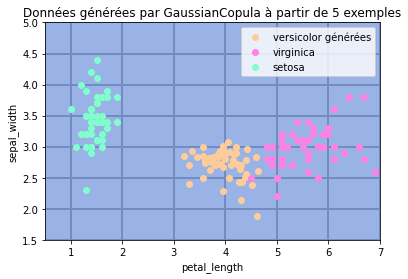

In [ ]:
plt.rc('axes', axisbelow=True)

plt.figure()
plt.axes().set(facecolor=(.6,.7,.9,1.))
plt.xlim(.5,7.)
plt.xlabel('petal_length')
plt.ylim(1.5,5.)
plt.ylabel('sepal_width')
plt.title('Données générées par GaussianCopula à partir de 5 exemples')
plt.grid(axis="both", linewidth=2, color=(.45,.55,.75,1.))

plt.scatter(gen['petal_length'].values, gen['sepal_width'].values, color=(1.,0.8,.6,1.), label='versicolor générées')
plt.scatter(virginica['petal_length'].values, virginica['sepal_width'].values, color=(1.,0.5,.9,1.), label='virginica')
plt.scatter(setosa['petal_length'].values, setosa['sepal_width'].values, color=(.5,1.,.8,1.), label='setosa')

plt.legend()

plt.show()

#Evaluation dans la prédiction :
-  tout d'abord entrainer un LR sur df
-  ensuite générer de nouvelles données et tester LR dessus à chaque fois sans le réentrainer

-  pour la prédiction on évalue juste sur les données Versicolor générées (pour l'apprentissage on ajoutera un autre test sur les deux autres classes pour vérifier qu'elles ne sont pas affectées).

In [ ]:
Xdf = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
ydf = df['species']

clf=LogisticRegression()
clf.fit(Xdf, ydf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

On fait varier le nombre de suppressions de 2 à 48 avec un step de 4.

Pour chaque nombre de suppressions, on répète le cycle suppression-génération-prédiction 5 fois et fait la moyenne des résultats.

In [ ]:
accuracy=[]
precision=[]
recall=[]
counts = []

for count in np.arange(1,48,4):
  print("suppression de ",count," données")
  accuracies = []
  precisions = []
  recalls = []
  for i in range(5):
    cut = cut_from_versicolor(count, df)
    gen = generate_and_get_versicolor(cut)
    print("génération de ",len(gen)," données")

    Xgen = gen[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    ygen = gen['species']
    print(ygen.value_counts())

    pred = clf.predict(Xgen)
    
    rep = classification_report(ygen, pred, output_dict=True)
    accuracies.append(rep['accuracy'])
    precisions.append(rep['versicolor']['precision'])
    recalls.append(rep['versicolor']['recall'])

  accuracy.append(np.mean(accuracies))
  precision.append(np.mean(precisions))
  recall.append(np.mean(recalls))
  counts.append(count)

results = pd.DataFrame()
results['nombre de données supprimées puis générées']=[50-count for count in counts]
results['exactitude']=accuracy
results['rappel']=recall
results['precision']=precision

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

suppression de  1  données
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
suppression de  5  données
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
suppression de  9  données
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

génération de  50  données
versicolor    50
Name: species, dtype: int64
suppression de  13  données
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
suppression de  17  données
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
suppression de  21  données
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
suppression de  25  données


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
suppression de  29  données
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
suppression de  33  données
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
suppression de  37  données
génération de  50  données
versicolor    50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
suppression de  41  données
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

génération de  50  données
versicolor    50
Name: species, dtype: int64
suppression de  45  données
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64
génération de  50  données
versicolor    50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
results.head(10)

,nombre de données supprimées puis générées,exactitude,rappel,precision
0,49,0.944,0.944,1.0
1,45,0.940,0.940,1.0
2,41,0.944,0.944,1.0
3,37,0.928,0.928,1.0
4,33,0.956,0.956,1.0
5,29,0.932,0.932,1.0
6,25,0.936,0.936,1.0
7,21,0.936,0.936,1.0
8,17,0.956,0.956,1.0
9,13,0.944,0.944,1.0


En faire un plot :
(On ne plot que l'exactitude car la précision sera à 100% et le rappel égal à l'exactitude comme on n'a que des versicolor dans y_true)

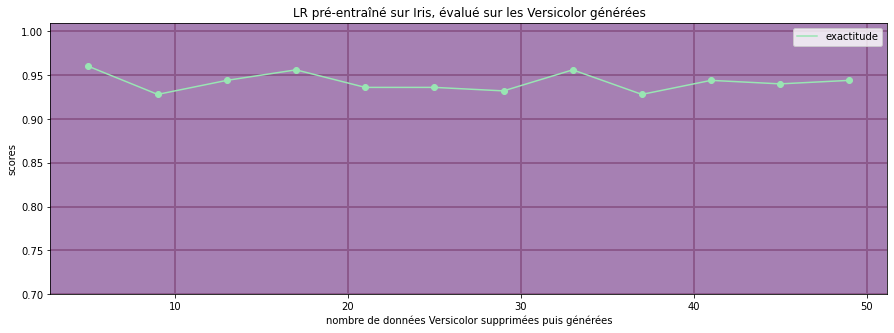

In [ ]:
plt.figure(figsize=(15,5))
plt.axes().set(facecolor=(.65,.5,.7,1.))
plt.plot(results['nombre de données supprimées puis générées'], results['exactitude'], color=(.6,.9,.7,1.),label='exactitude')
plt.plot(results['nombre de données supprimées puis générées'], results['exactitude'],'o', color=(.6,.9,.7,1.))


plt.legend()
plt.xlabel("nombre de données Versicolor supprimées puis générées")
plt.ylabel("scores")
plt.ylim(0.7,1.01)
plt.grid(axis="both", linewidth=2, color=(.55,.35,.55,1.))
plt.title("LR pré-entraîné sur Iris, évalué sur les Versicolor générées")

plt.show()

#Evaluation dans l'apprentissage

-   On fait la même boucle sauf que cette fois-ci on ré-entraine LR à chaque fois sur les données générées.
-   Le second changement est qu'on teste sur les données d'origine.
-   On fait d'abord une expérimentation en testant juste sur Versicolor, puis on en fait une seconde en testant sur les deux autres classes.

Première expérimentation :

In [ ]:
vers = df.loc[df['species']=='versicolor']
XdfVersicolor = vers[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
ydfVersicolor = vers['species']

In [ ]:
accuracy=[]
precision=[]
recall=[]
counts = []

for count in np.arange(1,48,4):
  print("suppression de ",count," données")
  accuracies = []
  precisions = []
  recalls = []
  for i in range(5):
    clf = LogisticRegression()

    cut = cut_from_versicolor(count, df)
    gen = generate_versicolor(cut)
    print("génération de ",count," données")

    Xgen = gen[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    ygen = gen['species']
    print(ygen.value_counts())
    clf.fit(Xgen,ygen)


    pred = clf.predict(XdfVersicolor)
    
    rep = classification_report(ydfVersicolor, pred, output_dict=True)
    accuracies.append(rep['accuracy'])
    precisions.append(rep['versicolor']['precision'])
    recalls.append(rep['versicolor']['recall'])

  accuracy.append(np.mean(accuracies))
  precision.append(np.mean(precisions))
  recall.append(np.mean(recalls))
  counts.append(count)

results = pd.DataFrame()
results['nombre de données supprimées puis générées']=[50-count for count in counts]
results['exactitude']=accuracy
results['rappel']=recall
results['precision']=precision

suppression de  1  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  1  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  1  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  1  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  1  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  1  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  5  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  5  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  5  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  5  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  5  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  5  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  9  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  9  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  9  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  9  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  9  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  9  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  13  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  13  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  13  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  13  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  13  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  13  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  17  données


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  17  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  17  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  17  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  17  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWa

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  17  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  21  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  21  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  21  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  21  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  21  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  21  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  25  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  25  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  25  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  25  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  25  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  25  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  29  données


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  29  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  29  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  29  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  29  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  29  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  33  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  33  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  33  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  33  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWa

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  33  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  33  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  37  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  37  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  37  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  37  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  37  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  37  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  41  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  41  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  41  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  41  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  41  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  41  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  45  données


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  45  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  45  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  45  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  45  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  45  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

En faire un plot :

(on ne plot que l'exactitude car comme y_true ne contient qu'une seule classe, le rappel sera égal à l'exactitude et la précision sera à 100% si on regarde juste sur Versicolor)

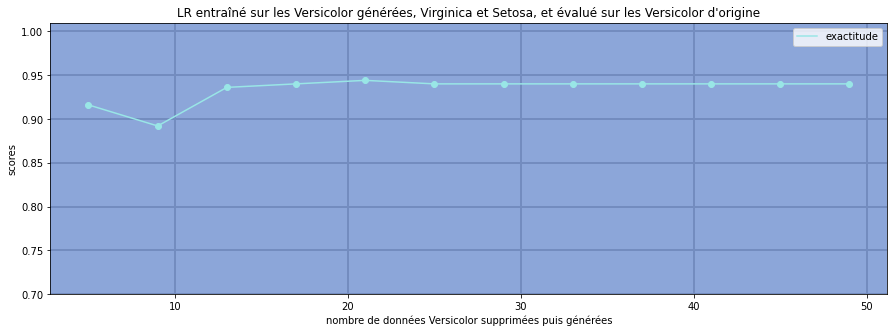

In [ ]:
#encore une fois, que la précision et l'accuracy

plt.figure(figsize=(15,5))
plt.axes().set(facecolor=(.55,.65,.85,1.))

plt.plot(results['nombre de données supprimées puis générées'], results['exactitude'], color=(.6,.9,.9,1.),label='exactitude')
plt.plot(results['nombre de données supprimées puis générées'], results['exactitude'],'o', color=(.6,.9,.9,1.))

plt.legend()
plt.xlabel("nombre de données Versicolor supprimées puis générées")
plt.ylabel("scores")
plt.ylim(0.7,1.01)
plt.grid(axis="both", linewidth=2, color=(.45,.55,.75,1.))
plt.title("LR entraîné sur les Versicolor générées, Virginica et Setosa, et évalué sur les Versicolor d'origine")

plt.show()

Seconde expérimentation : vérifier que les scores sur les autres classes ne sont pas affectés

In [ ]:
group = df.groupby('species')
others = pd.concat([group.get_group('virginica'), group.get_group('setosa')])
XdfOthers = others[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
ydfOthers = others['species']

In [ ]:
accuracy=[]
precisionS=[]
precisionV=[]
recallS=[]
recallV=[]
counts = []

for count in np.arange(1,48,4):
  print("suppression de ",count," données")
  accuracies = []
  precisionsV = []
  recallsV = []
  precisionsS = []
  recallsS = []
  for i in range(5):
    clf = LogisticRegression()

    cut = cut_from_versicolor(count, df)
    gen = generate_versicolor(cut)
    print("génération de ",count," données")

    Xgen = gen[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    ygen = gen['species']
    print(ygen.value_counts())
    clf.fit(Xgen,ygen)


    pred = clf.predict(XdfOthers)
    
    rep = classification_report(ydfOthers, pred, output_dict=True)
    accuracies.append(rep['accuracy'])
    precisionsS.append(rep['setosa']['precision'])
    recallsS.append(rep['setosa']['recall'])
    precisionsV.append(rep['virginica']['precision'])
    recallsV.append(rep['virginica']['recall'])

  accuracy.append(np.mean(accuracies))
  precisionS.append(np.mean(precisionsS))
  recallS.append(np.mean(recallsS))
  precisionV.append(np.mean(precisionsV))
  recallV.append(np.mean(recallsV))
  counts.append(count)

results = pd.DataFrame()
results['nombre de données supprimées puis générées']=[50-count for count in counts]
results['exactitude']=accuracy
results['rappelVirginica']=recallV
results['precisionVirginica']=precisionV
results['rappelSetosa']=recallS
results['precisionSetosa']=precisionS

suppression de  1  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  1  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  1  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  1  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  1  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  1  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  5  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  5  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  5  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  5  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWa

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  5  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  5  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  9  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  9  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  9  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  9  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  9  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  9  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


suppression de  13  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  13  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  13  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  13  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  13  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  13  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  17  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  17  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  17  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  17  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  17  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  17  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  21  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  21  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  21  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  21  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  21  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  21  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  25  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  25  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWa

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  25  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  25  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  25  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  25  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWa

suppression de  29  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  29  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  29  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  29  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWa

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  29  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  29  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  33  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  33  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  33  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  33  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  33  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  33  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  37  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  37  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  37  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  37  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  37  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  37  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

suppression de  41  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  41  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  41  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  41  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  41  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  41  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
suppression de  45  données
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  45  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  45  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object'

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  45  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
génération de  45  données
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels 

Ici aussi on a la même chose sur la précision et le recall car on ne confond jamais setosa avec virginica, seulement avec versicolor. (versicolor est entre setosa et virginica visuellement)

Ainsi les seules erreurs sont des versicolors, et ainsi, chaque prédiction est juste (prec=100)
De plus le rappel est égal à l'exactitude car le nbre de vrais positifs est égal au total de bonnes prédictions	et le total des faux négatifs est égal au nombre de mal classés

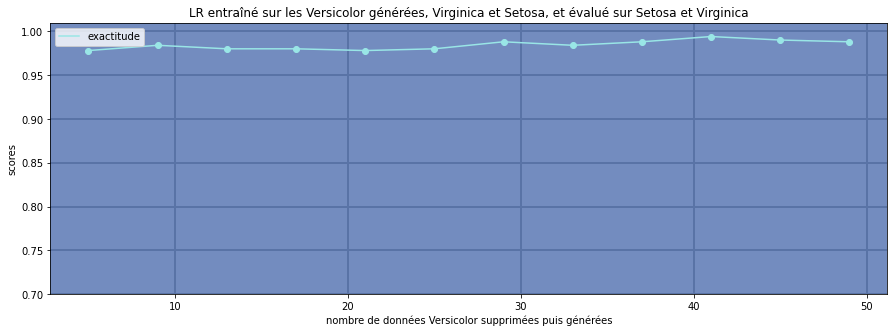

In [ ]:
plt.figure(figsize=(15,5))
plt.axes().set(facecolor=(.45,.55,.75,1.))

plt.plot(results['nombre de données supprimées puis générées'], results['exactitude'], color=(.6,.9,.9,1.),label='exactitude')
plt.plot(results['nombre de données supprimées puis générées'], results['exactitude'],'o', color=(.6,.9,.9,1.))



plt.legend()
plt.xlabel("nombre de données Versicolor supprimées puis générées")
plt.ylabel("scores")
plt.ylim(0.7,1.01)
plt.grid(axis="both", linewidth=2, color=(.35,.45,.65,1.))
plt.title("LR entraîné sur les Versicolor générées, Virginica et Setosa, et évalué sur Setosa et Virginica")

plt.show()